In [3]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
from datasets import load_dataset

# Loading data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

# Data Cleanup
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])

# Filtering NaN values
df["job_skills"] = df["job_skills"].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [ ]:
df_exploded_skills = df.explode("job_skills")
df_exploded_skills

In [ ]:
skill_count = df_exploded_skills.groupby(["job_title_short", "job_skills"]).size()
skill_count


In [12]:
df_skill_count = skill_count.reset_index(name="skill_count")
df_skill_count = df_skill_count.sort_values(by="skill_count", ascending=False)
df_skill_count

,job_title_short,job_skills,skill_count
1066,Data Scientist,python,113711
865,Data Engineer,sql,113130
830,Data Engineer,python,108022
625,Data Analyst,sql,92428
1101,Data Scientist,sql,78982
...,...,...,...
266,Cloud Engineer,delphi,1
1920,Senior Data Scientist,objective-c,1
1400,Senior Data Analyst,couchdb,1
298,Cloud Engineer,haskell,1


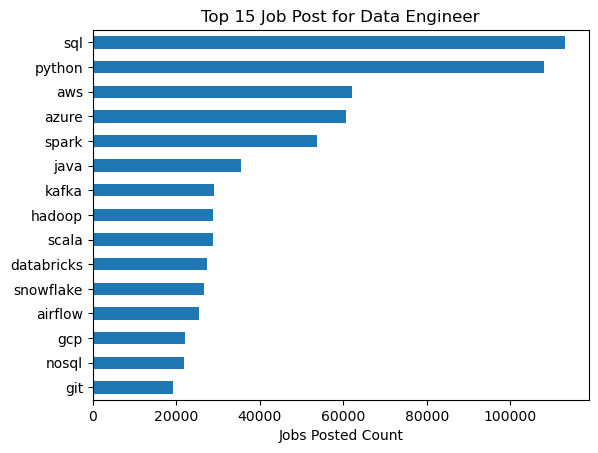

In [24]:
job_title = "Data Engineer"
top_head = 15

final_skill_count = df_skill_count[df_skill_count["job_title_short"] == job_title].head(top_head)
final_skill_count.plot(kind="barh", x="job_skills", y="skill_count")
plt.gca().invert_yaxis()
plt.title(f"Top {top_head} Job Post for {job_title}")
plt.ylabel("")
plt.xlabel("Jobs Posted Count")
plt.legend().set_visible(False)
plt.show()

In [ ]:
df_exploded_skills["job_skills"].value_counts().head(15).plot(kind="bar")